# Final Exercise #

- Using numpy, generate a time series of 365 days simulating how many daily visitors a park gets. There must be a trend representing a growth in popularity over time, with an overall mean of 2000 visitors and a standard deviation of 500
- Create a pandas DataFrame using dates as indices and visitors as the column
- Calculate the mean of visitors per month and the corresponding standard deviation
- Create a line graph displaying the change in daily visitors over time, then add to it the weekly moving average. Moreover, create another graph showing the monthly mean for visitors.
- ### FIX TREND (doesn't show right now) ###

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
days = 365
mean = 2000
sd = 500
seed = 12345
daily_growth = 0.001

In [212]:
np.random.seed(seed)
standard_distribution = np.random.normal(0, 1, days)  # generate the normal errors
scaling_factors = np.linspace(1,1+daily_growth*(days-1),days)  # factors by which they grow over time
scaled_distribution = standard_distribution*scaling_factors  # scale the errors
normal_scaled_distribution = (scaled_distribution-np.mean(scaled_distribution))/np.std(scaled_distribution)  # re-standardize
visitor_distribution = np.array([int(i) for i in (mean + normal_scaled_distribution*sd)])  # final visitor distribution with a growing trend respecting given distribution

In [213]:
type(visitor_distribution)

numpy.ndarray

In [214]:
dictionary = {'visitors': visitor_distribution}
dataframe = pd.DataFrame(dictionary)
dataframe.head()

,visitors
0,1926
1,2218
2,1792
3,1776
4,2855


In [215]:
months = [0,31,28,31,30,31,30,31,31,30,31,30,31]
cumsum_months = np.cumsum(months)  # output: array([  0,  31,  59,  90, 120, 151, 181, 212, 243, 273, 304, 334, 365])
monthly_visitor_mean = []
monthly_visitor_sd = []
for i in range(12):
    section = dataframe['visitors'][cumsum_months[i]:cumsum_months[i+1]]
    monthly_visitor_mean.append(section.mean())
    monthly_visitor_sd.append(section.std())
for i in range(12):
    print(f"Month: {i+1}, visitor mean: {monthly_visitor_mean[i]:.3f}, visitor standard deviation: {monthly_visitor_sd[i]:.3f}")

Month: 1, visitor mean: 2145.032, visitor standard deviation: 459.135
Month: 2, visitor mean: 1839.357, visitor standard deviation: 462.819
Month: 3, visitor mean: 2011.871, visitor standard deviation: 431.012
Month: 4, visitor mean: 2036.900, visitor standard deviation: 457.090
Month: 5, visitor mean: 1989.226, visitor standard deviation: 427.328
Month: 6, visitor mean: 2024.500, visitor standard deviation: 552.108
Month: 7, visitor mean: 1975.548, visitor standard deviation: 516.037
Month: 8, visitor mean: 1950.226, visitor standard deviation: 529.990
Month: 9, visitor mean: 1911.933, visitor standard deviation: 499.582
Month: 10, visitor mean: 1933.516, visitor standard deviation: 515.015
Month: 11, visitor mean: 2105.200, visitor standard deviation: 636.298
Month: 12, visitor mean: 2057.710, visitor standard deviation: 499.994


In [216]:
print(np.std(dataframe['visitors'][:]))
print(np.mean(dataframe['visitors'][:]))

500.0037293912333
1999.4931506849316


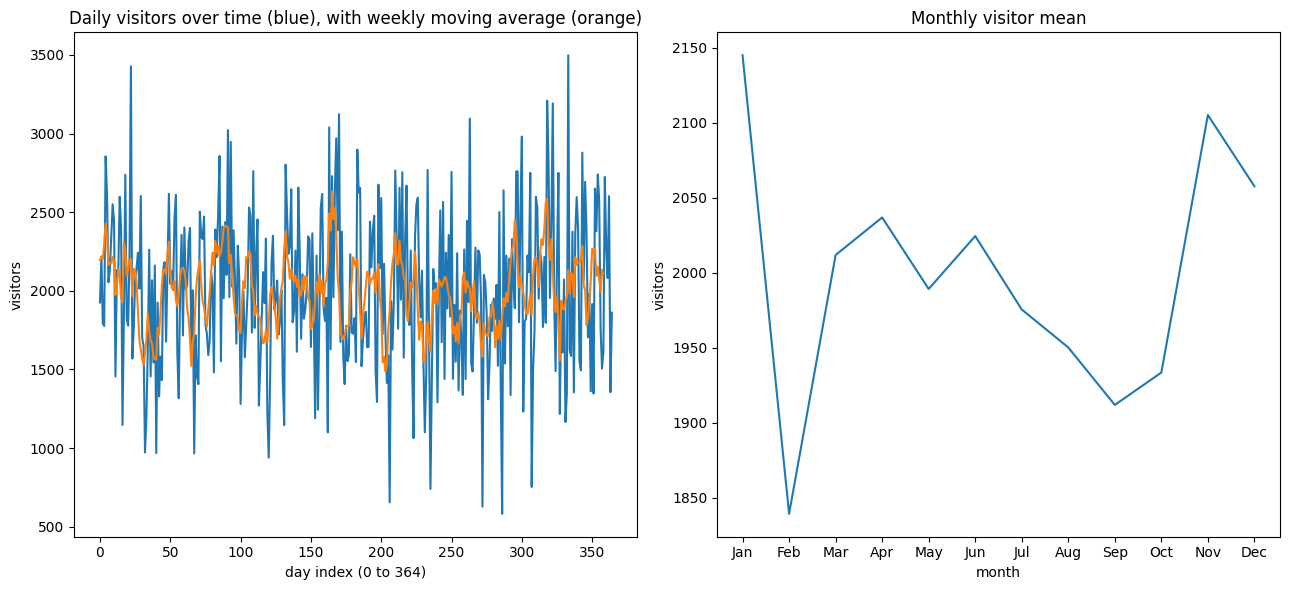

In [217]:
plt.figure(figsize=(13, 6))


window = 7  # odd for simplicity, we include the point at time t
m = int((window-1)/2)
moving_average = [visitor_distribution[index-m:index+m].mean() for index in range(m,len(visitor_distribution)-m)]

plt.subplot(1,2,1)
plt.plot(range(days), visitor_distribution)
plt.plot(range(len(moving_average)), moving_average)
plt.xticks()
plt.yticks()
plt.xlim()
plt.ylim()
plt.title("Daily visitors over time (blue), with weekly moving average (orange)")
plt.xlabel("day index (0 to 364)")
plt.ylabel("visitors")


plt.subplot(1,2,2)
plt.plot(range(12), monthly_visitor_mean)
plt.xticks(range(12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.yticks()
plt.xlim()
plt.ylim()
plt.title("Monthly visitor mean")
plt.xlabel("month")
plt.ylabel("visitors")


plt.tight_layout()
plt.show()